# Overplotting: problems and solutions
by Giancarlo Ruffo, Università degli Studi di Torino

*Scatterplots* are extremely useful, expecially in scientific visualisation, to make sense of data. They turn out to be pretty good when your dataset is big. It is usually the first step of an iterative visualisation process that help to detect some signal of hidden patterns that require some further analysis to verify if such a structure in our dataset really exist.

As many great tools that we commonly use, scatterplots also suffer of some issue. In particular, when the dataset is too big, overplotting can hide some existing pattern: too many dots in the same area are just drawn covering the others, and your graphic becames unreadable. To be fair, scatterplots are not the only charts that may suffer of overplotting issues, but however this problem is very common with this tipology of charting, so you can find a lot of great tutorial on-line to understand how overplotting can be reduced with your own preferred language or library. For example, many of the ideas we used for creating this notebook have been inspired from [#134 How to avoid overplotting with python](https://python-graph-gallery.com/134-how-to-avoid-overplotting-with-python/). 

If you are looking for a deeper methodological explanation, I suggest reading the following excellent book: *Stephen Few, Now You See It Analytics Press, 2009, in particular the *Analytical Techniques and Practices* Chapter has a section dedicated to *Over-plotting reduction*.

In [1]:
# libraries and data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# we also use seaborn here, a library based on matplotlib;
# it provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns
plt.style.use('seaborn')

In [2]:
# Dataset: we create three big groups of data, clustered by construction
df=pd.DataFrame({'x': np.random.normal(10, 1.2, 20000), 'y': np.random.normal(10, 1.2, 20000), 'group': np.repeat('A',20000) })
tmp1=pd.DataFrame({'x': np.random.normal(14.5, 1.2, 20000), 'y': np.random.normal(14.5, 1.2, 20000), 'group': np.repeat('B',20000) })
tmp2=pd.DataFrame({'x': np.random.normal(9.5, 1.5, 20000), 'y': np.random.normal(15.5, 1.5, 20000), 'group': np.repeat('C',20000) })
df=df.append(tmp1).append(tmp2)

Text(0.0, 1.0, 'Overplotting example')

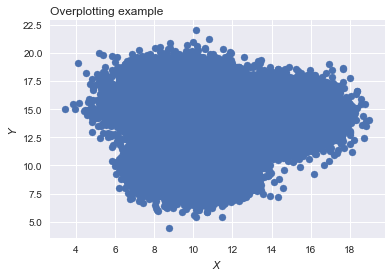

In [3]:
# plot - we use scatter() method here
plt.scatter( df.x, df.y, marker='o')
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('Overplotting example', loc='left')

It looks like a large spot. A trained eye can suspect there is something behind there, but you are biased because you know that that three different groups were created on purpose. Let's apply some tricks here and there.

## Reducing size and changing shape

One of the reasons of overplotting is that one dot is merged to other dots just because they are to close each other in 2D grid. We can smooth this effect reducing each dot size, so that probability of overlap is just reduced.

Text(0.0, 1.0, 'Overplotting: reducing size')

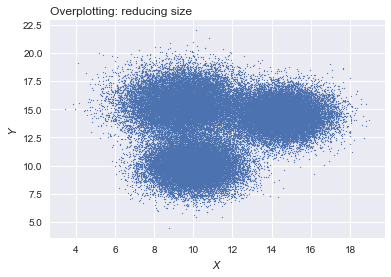

In [4]:
# using `s` argument to reduce size
plt.scatter( df.x, df.y, marker='o', s=1)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('Overplotting: reducing size', loc='left')

Things are much better now. One may wonder if it is just using circles instead of other markers' shapes that brings to overplotting.

Text(0.0, 1.0, 'Overplotting: changing shape')

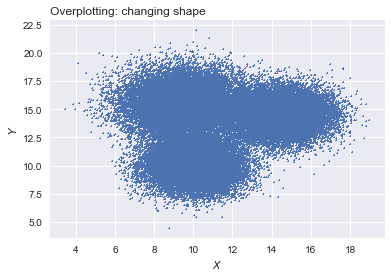

In [5]:
# Plot with small marker size
plt.scatter( df.x, df.y, marker='+', s=1)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('Overplotting: changing shape', loc='left')

Your eyes can judge which solution is better. If you opt for circles, you may want to try some other tricks, like for example, removing circle's fill color. Argument `facecolor` may come to assist you.

Text(0.0, 1.0, 'Overplotting: removing fill color')

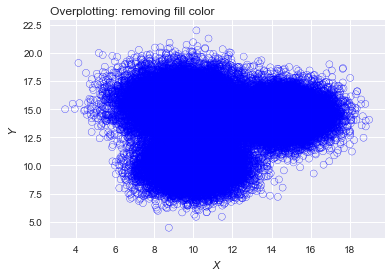

In [6]:
plt.scatter( df.x, df.y, marker='o', facecolors='none', edgecolors='b')
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('Overplotting: removing fill color', loc='left')

It is likely that you have still too many dots here: even if we remove fill colors, we still have to many dots so close to each other that many circles' borders fill other circles' areas. Can you try to combine all the effects you have seen so far to let emerge our regularities more clearly? If you do, just add a cell below and make your experiments.

# Using transparency

Increasing transparency setting `alpha` channel properly, emphasizes differences in density in our three groups. Here you can mantain circles to represent our points, and you can also reduce the circle sizes to further reduce overplotting issues. Changing the color can also helps: points in low density areas are barely visible because of low transparency, and using a more contrasting hue can improve slightly the final quality. 

Text(0.0, 1.0, 'Overplotting: setting transparency')

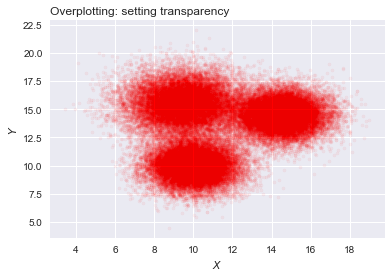

In [7]:
plt.scatter( df.x, df.y, marker='o', alpha=0.05, s=10, color="r")
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('Overplotting: setting transparency', loc='left')

One of the most important lesson you have probably learned so far is that there is no technique that is clearly superior than the others: sometimes you have to iterate exhaustively your visualisation experiments to make sense of your noisy data. Digging deeper and deeper may lead you to have an intuition of some hidden patterns, but the border with *torturing* your data to unveil what you expect to see is a very thin line. Moreover, Gestalt effects are one step away, you can start suffer of *data hallucination* ore being just another victim of pareidolia: remember that **the mind can perceive a familiar pattern of something where none actually exists**! To avoid this, you have a lot of quantitative tools that can assist your rational reasoning when it starts to be too much tempted to your intuition and imagination. Just remember that rationality and intuition, even if they often agree to disagree, are your best friends, but none of them should be left too much behind. 

Luckily enough, you can embed some quantitative and analytical tools to your charts: if you have the intuition that point's density is stronger at the core of each groups and it decreases while you move radially away from the center, than you can stop tricking with transparencies, sizes and shapes, and measure **densities** directly. Luckily enough, there are a lot of methods you can use to leave much of the work to python and to your libraries.

## Density plots


A *Density Plot* is an extension of the popular histograms, showing the distribution of data over a continuous interval or time period. They use the so called *kernel smoother* (no surpr ise that they are also called *Kernel Density Plots*), namely a statistical technique that estimates a function with real values $f: \mathbb{R}^p \to \mathbb{R}$. The value is defined by the *kernel*, such that closer points are given higher weights. The outcomes is a smooth function, whose level of smoothness is set by a single parameter $p$. In data visualisation, this parameter is set very low ($p < 3$), to keep the dimension of the predictor small, that allows for smoother passages from one discrete value to another. This makes also emerge quite clearly the peaks of a Density Plot where values are concentrated over the interval.

An advantage Density Plots have over Histograms is that they're better at determining the distribution shape because they're not affected by the number of bins used (each bar used in a typical histogram). A Histogram comprising of only 4 bins wouldn't produce a distinguishable enough shape of distribution as a 20-bin Histogram would. However, with Density Plots, this isn't an issue.

density plot or  2D histogram is an extension of the well known histogram. It shows the distribution of values in a data set across the range of two quantitative variables. It is really
useful to avoid over plotting in a scatterplot. If you have too many dots, the 2D density plot counts the number of observations within a particular area of the 2D space. This specific area can be
a square or a hexagon (hexbin). You can also estimate a 2D kernel density estimation and represent it with contours.